In [1]:
# Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../../../')

from src import customFunc as cf
from src import ansatzs as anz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import FakeManila
import time

import pyscf
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import FakeGuadalupeV2
from qiskit.providers.aer import AerSimulator

In [ ]:
# Observable
obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

# Ansatz
dist = 0.958
sen = np.sin(104.5/2 *360/2/np.pi)
cos = np.cos(104.5/2 *360/2/np.pi)
geometry = f"O 0.0 0.0 0.0; H {sen*dist} {cos*dist} 0.0; H -0.757 0.586 0.0"


def build_UCCSD_ansatz(num_qubits):

    driver = PySCFDriver(atom=geometry, basis='sto3g')
    es_problem = driver.run()  
    num_particles = es_problem.num_particles # Hacemos que el número de electrones sea constante
    num_spatial_orbitals = num_qubits // 2 # Escalamos el número de orbitales-spin en función del número de qubits

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters

# ansatz, num_params = build_UCCSD_ansatz(4, geometry)
# ansatz.decompose().draw("mpl")

data = []
data.append(cf.variance_vs_nQubits(build_UCCSD_ansatz, 14, 18, obs_qubit, 0, 1000, True, True, True, True))


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.09051729708407691
Varianza de la derivada: 1.61493299206914e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.03656932402223316
Varianza de la derivada: 1.2534765057065146e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.02027456173133183
Varianza de la derivada: 1.2884596423139184e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.010603180122881667
Varianza de la derivada: 8.055821284135642e-33

Pendiente para valor esperado: -0.3511501871063926.
R^2 para valor esperado: 0.9904883541260726.

Pendiente para derivada: -0.10294621134360753.
R^2 para derivada: 0.834744334072259.


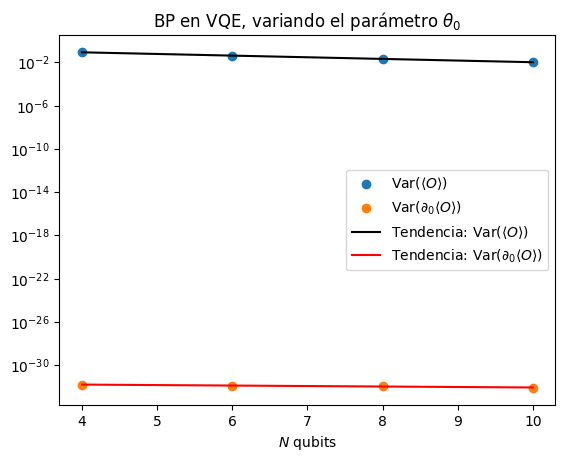

In [ ]:
# Lo mismo que antes pero dejando fijo el número de electrones y escalando los orbitales

obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters

# ansatz, num_params = build_UCCSD_ansatz(4, obs_qubit)
# ansatz.decompose().draw("mpl")

data = []
data.append(cf.variance_vs_nQubits(build_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True))


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.005693587398529051
Varianza de la derivada: 0.00012219932079315186

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.00036778979301452637
Varianza de la derivada: 0.00014794521331787112

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00025636138916015623
Varianza de la derivada: 0.00011767284274101256

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.00021374166011810307
Varianza de la derivada: 0.00010931081175804137

Pendiente para valor esperado: -0.5103953286433818.
R^2 para valor esperado: 0.7351055448816255.

Pendiente para derivada: -0.02816541552149676.
R^2 para derivada: 0.31757032538791374.


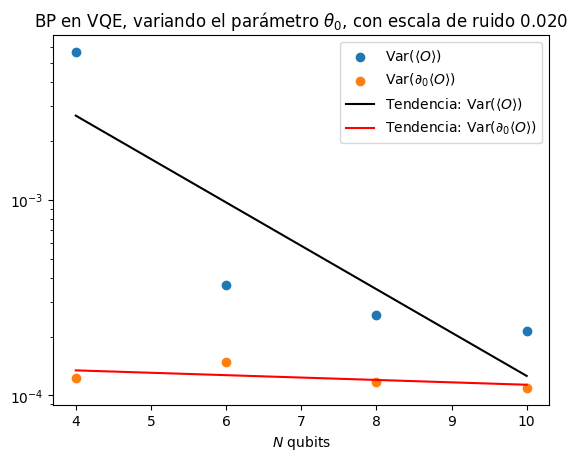

In [3]:
# Observable
obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

# Ansatz
def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters


# Análisis del ruido
from qiskit.providers.fake_provider import FakeMontreal
fake_backend = FakeMontreal()
data_noise = []

data_noise.append(cf.noisy_variance_vs_nQubits(build_UCCSD_ansatz, fake_backend, 0.02, 4, 10, obs_qubit, 0, 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True))

In [5]:
print(data_noise)

[{'n_qubits': [4, 6, 8, 10], 'var_value': [0.005693587398529051, 0.00036778979301452637, 0.00025636138916015623, 0.00021374166011810307], 'var_deriv': [0.00012219932079315186, 0.00014794521331787112, 0.00011767284274101256, 0.00010931081175804137], 'value_slope': -0.5103953286433818, 'value_ord': -3.876252362831899, 'value_rsquare': 0.7351055448816255, 'deriv_slope': -0.02816541552149676, 'deriv_ord': -8.802202880123463, 'deriv_rsquare': 0.31757032538791374}]
